# Proyecto: Clustering y clasificación de Clientes

<p>
Alumno: Martin Adrian Ferraguti <br>
Comisión: 60880 <br>
Curso: Data Science II: Machine Learning para la Ciencia de Datos <br>
</p>

### Definición del objetivo:
El presente proyecto tiene por objetivo: <br>
1- Realizar la clusterización o segmentación de la base de clientes de la empresa “Ficticia” la cual pertenece al rubro de supermercados.<br>
2- Intentar predecir la intención de compra de cada cliente.<br>

Esto nos permitirá:<br>
- Determinar la importancia de cada segmento de cliente para el negocio.<br>
- Modificar la oferta de producto para que se adapten a las necesidades de estos.<br>
- Entender sus necesidades e inquietudes.<br>
- Optimizar las campañas de marketing concentrando esfuerzo sobre aquellos clientes que tengan mayor probabilidad de compra.<br>

### Definición del contexto comercial:
El presente proyecto se solicita en medio de un contexto socioeconómico general muy apremiante el cual está obligando a la empresa a tomar decisiones comerciales estratégicas, valiéndose para ello de la  información que ya tiene relevada de sus clientes y sus hábitos de consumo como un mecanismo para incrementar sus ventas por medio de procesos de marketing.<br>

### Definición del problema comercial:
Realizar la clusterización o segmentación de la cartera de clientes en función de sus hábitos de consumo y determinar la intención de compra de nuevos compradores de forma tal que resulte de utilidad al área de marketing para el desarrollo de campañas publicitarias.<br>

### ![Liberías utilizadas](https://raw.githubusercontent.com/chetincho/proyecto_data_science_ii/main/img/librerias_utilizadas.jpg)

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

### ![Data Acquisition](https://raw.githubusercontent.com/chetincho/proyecto_data_science_ii/main/img/data_acquisition.jpg)
Los datos son provistos por el data engineer en jefe de la empresa, el sr. Juan Carlos Anonimo. Dichos datos serán publicados automáticamente todos los lunes a las 09:50 hs hora Argentina, momento en el cual estarán disponibles para su consumo.<br>
- Directorio de publicacion: github.com/datasets/data_acquisition/<br>
- Nombre del archivo: data.csv<br>
- Separador de columnas: punto y coma (;)<br>
<br>
Adicional se adjuntan los datos de contacto del referente del área.<br>
Email: juancarlosanonimo@ficticia.com.ar<br>
Horario laboral: de lunes a viernes de 09:00 a 17:00 hs<br>


In [181]:
url = 'https://raw.githubusercontent.com/chetincho/proyecto_data_science_ii/main/dataset/data_acquisition/data.csv'
df = pd.read_csv(url, encoding='latin1', delimiter=';')

In [182]:
df.head()

,id_cliente,año_nac,educacion,estado_civil,ingresos_usd,cant_niños_casa,cant_adolecentes_casa,fch_alta_cliente,dias_ult_compra,gasto_total_vinos,...,cant_visitas_web_mes,campaña_mkt_1,campaña_mkt_2,campaña_mkt_3,campaña_mkt_4,campaña_mkt_5,quejas,id_base_contacto,cod_retorno_esperado,respuestas
0,5524,1957,Universitario,Soltero,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Universitario,Soltero,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Universitario,En pareja,71613.0,0,0,21/8/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Universitario,En pareja,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Doctorado,Casado,58293.0,1,0,19/1/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [183]:
df.tail()

,id_cliente,año_nac,educacion,estado_civil,ingresos_usd,cant_niños_casa,cant_adolecentes_casa,fch_alta_cliente,dias_ult_compra,gasto_total_vinos,...,cant_visitas_web_mes,campaña_mkt_1,campaña_mkt_2,campaña_mkt_3,campaña_mkt_4,campaña_mkt_5,quejas,id_base_contacto,cod_retorno_esperado,respuestas
2236,10870,1967,Universitario,Casado,61223.0,0,1,13/6/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2237,4001,1946,Doctorado,En pareja,64014.0,2,1,10/6/2014,56,406,...,7,1,0,0,0,0,0,3,11,0
2238,7270,1981,Universitario,Divorciado,56981.0,0,0,25/1/2014,91,908,...,6,0,0,0,1,0,0,3,11,0
2239,8235,1956,Licenciado,En pareja,69245.0,0,1,24/1/2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2240,9405,1954,Doctorado,Casado,52869.0,1,1,15/10/2012,40,84,...,7,0,0,0,0,0,0,3,11,1


💡 *Conclusión:* La carga inicial de los datos ha sido exitosa, se reporta que el origen de los datos cuenta con 29 atributos los cuales coinciden con las 29 columnas reportadas en el dataframe.

### ![Exploratory Data Analysis (EDA)](https://raw.githubusercontent.com/chetincho/proyecto_data_science_ii/main/img/exploratory_data_analysis_EDA.jpg)

#### Información sobre la estructura de datos

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_cliente                  2241 non-null   int64  
 1   año_nac                     2241 non-null   int64  
 2   educacion                   2241 non-null   object 
 3   estado_civil                2241 non-null   object 
 4   ingresos_usd                2217 non-null   float64
 5   cant_niños_casa             2241 non-null   int64  
 6   cant_adolecentes_casa       2241 non-null   int64  
 7   fch_alta_cliente            2241 non-null   object 
 8   dias_ult_compra             2241 non-null   int64  
 9   gasto_total_vinos           2241 non-null   int64  
 10  gasto_total_frutas          2241 non-null   int64  
 11  gasto_total_carnes_rojas    2241 non-null   int64  
 12  gasto_total_carnes_blancas  2241 non-null   int64  
 13  gasto_total_dulces          2241 

💡 *Conclusión:* Se detectan los siguientes incidentes en los datos importados.
- 24 registros con valores nulos sobre el atributo "ingresos_usd".
- 7 desvíos entre el tipo de datos esperado y el importado para los siguientes atributos.


| Columna                   |Tipo esperado | Tipo importado |
|---------------------------|--------------|----------------|
|fch_alta_cliente           |datetime      |object          |
|gasto_total_vinos          |float64       |int64           |
|gasto_total_frutas         |float64       |int64           |
|gasto_total_carnes_rojas   |float64       |int64           |
|gasto_total_carnes_blancas |float64       |int64           |
|gasto_total_dulces         |float64       |int64           |
|gasto_total_enlatados      |float64       |int64           |

#### Resumen estadístico

In [185]:
columnas_a_describir = ['ingresos_usd',                 'cant_niños_casa',                  'cant_adolecentes_casa',
                        'dias_ult_compra',              'gasto_total_vinos',                'gasto_total_frutas',
                        'gasto_total_carnes_rojas',     'gasto_total_carnes_blancas',       'gasto_total_dulces',
                        'gasto_total_enlatados',        'cant_compras_oferta',              'cant_compras_web',
                        'cant_compras_por_catalogo',    'cant_compras_en_tienda',           'cant_visitas_web_mes']

df[columnas_a_describir].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ingresos_usd,2217.0,52252.116373,25168.438630,1730.0,35322.0,51390.0,68487.0,666666.0
cant_niños_casa,2241.0,0.443998,0.538360,0.0,0.0,0.0,1.0,2.0
cant_adolecentes_casa,2241.0,0.506024,0.544522,0.0,0.0,0.0,1.0,2.0
dias_ult_compra,2241.0,49.124052,28.964322,0.0,24.0,49.0,74.0,99.0
gasto_total_vinos,2241.0,303.886658,336.530264,0.0,24.0,174.0,504.0,1493.0
gasto_total_frutas,2241.0,26.317715,39.771309,0.0,1.0,8.0,33.0,199.0
gasto_total_carnes_rojas,2241.0,167.089692,225.761856,0.0,16.0,67.0,232.0,1725.0
gasto_total_carnes_blancas,2241.0,37.609103,54.760173,0.0,3.0,12.0,50.0,259.0
gasto_total_dulces,2241.0,27.100848,41.310266,0.0,1.0,8.0,33.0,263.0
gasto_total_enlatados,2241.0,44.015618,52.156634,0.0,9.0,24.0,56.0,362.0


💡 *Conclusión:* En el presente resumen se detecta la existencia de posibles outlier sobre el atributo "ingresos_usd".

#### Comprobación de valores nulos

In [186]:
df.isnull().sum()

id_cliente                     0
año_nac                        0
educacion                      0
estado_civil                   0
ingresos_usd                  24
cant_niños_casa                0
cant_adolecentes_casa          0
fch_alta_cliente               0
dias_ult_compra                0
gasto_total_vinos              0
gasto_total_frutas             0
gasto_total_carnes_rojas       0
gasto_total_carnes_blancas     0
gasto_total_dulces             0
gasto_total_enlatados          0
cant_compras_oferta            0
cant_compras_web               0
cant_compras_por_catalogo      0
cant_compras_en_tienda         0
cant_visitas_web_mes           0
campaña_mkt_1                  0
campaña_mkt_2                  0
campaña_mkt_3                  0
campaña_mkt_4                  0
campaña_mkt_5                  0
quejas                         0
id_base_contacto               0
cod_retorno_esperado           0
respuestas                     0
dtype: int64

In [187]:
df.isnull().mean()*100

id_cliente                    0.00000
año_nac                       0.00000
educacion                     0.00000
estado_civil                  0.00000
ingresos_usd                  1.07095
cant_niños_casa               0.00000
cant_adolecentes_casa         0.00000
fch_alta_cliente              0.00000
dias_ult_compra               0.00000
gasto_total_vinos             0.00000
gasto_total_frutas            0.00000
gasto_total_carnes_rojas      0.00000
gasto_total_carnes_blancas    0.00000
gasto_total_dulces            0.00000
gasto_total_enlatados         0.00000
cant_compras_oferta           0.00000
cant_compras_web              0.00000
cant_compras_por_catalogo     0.00000
cant_compras_en_tienda        0.00000
cant_visitas_web_mes          0.00000
campaña_mkt_1                 0.00000
campaña_mkt_2                 0.00000
campaña_mkt_3                 0.00000
campaña_mkt_4                 0.00000
campaña_mkt_5                 0.00000
quejas                        0.00000
id_base_cont

💡 *Conclusión:* Se comprueba que la estructura de datos cuenta únicamente con 24 registros con valores nulos correspondientes al atributo “ingresos_usd”, esto representa el 1.07% del total de registros de dicho atributo.

#### Comprobación de registros duplicados

In [188]:
print(f'Total de registros duplicados: {df.duplicated().sum()}')

Total de registros duplicados: 1


💡 *Conclusión:* Se comprueba que el dataset cuenta con un registro duplicado.

#### Visualización de la distribución de las variables

A continuación se diagrama una serie de blox plots con el objetivo de tener una visión mas clara de la distribución de los datos en términos de cuartiles y detectar outliers.

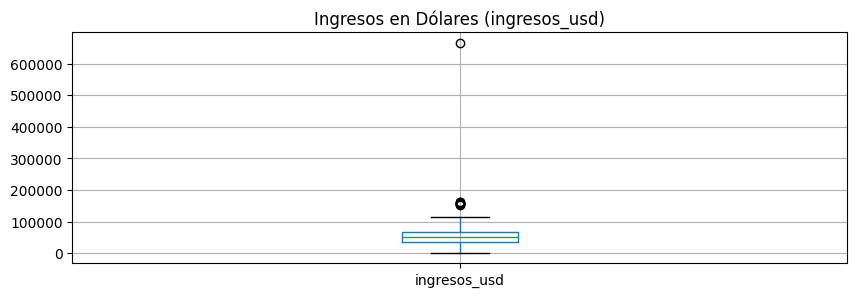

In [189]:
plt.figure(figsize=(10, 3))
df.boxplot(column='ingresos_usd')
plt.title('Ingresos en Dólares (ingresos_usd)')
plt.xticks(rotation=0)
plt.show()

💡 *Conclusión:* La gráfica muestra la presencia de outliers.

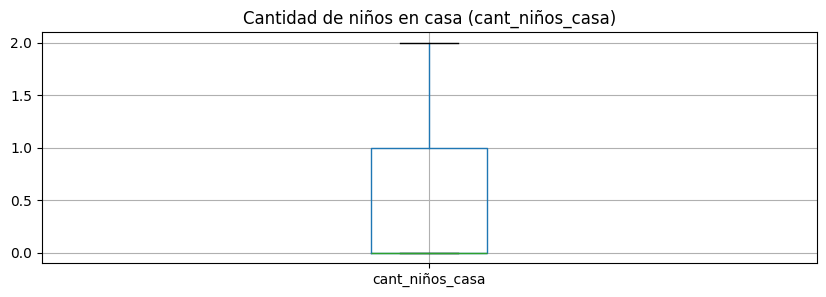

In [190]:
plt.figure(figsize=(10, 3))
df.boxplot(column='cant_niños_casa')
plt.title('Cantidad de niños en casa (cant_niños_casa)')
plt.xticks(rotation=0)
plt.show()

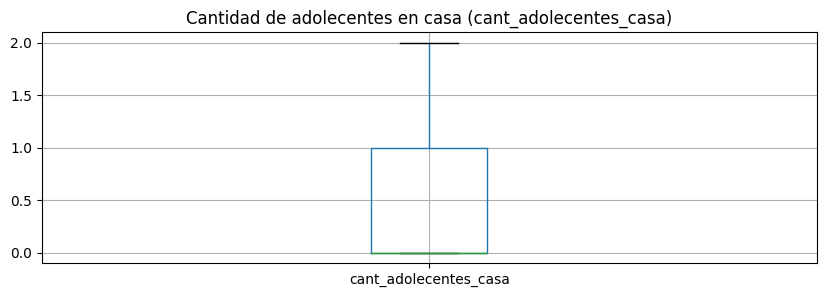

In [191]:
plt.figure(figsize=(10, 3))
df.boxplot(column='cant_adolecentes_casa')
plt.title('Cantidad de adolecentes en casa (cant_adolecentes_casa)')
plt.xticks(rotation=0)
plt.show()

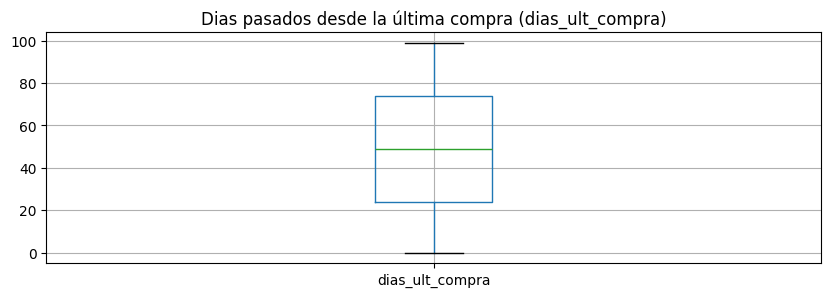

In [192]:
plt.figure(figsize=(10, 3))
df.boxplot(column='dias_ult_compra')
plt.title('Dias pasados desde la última compra (dias_ult_compra)')
plt.xticks(rotation=0)
plt.show()

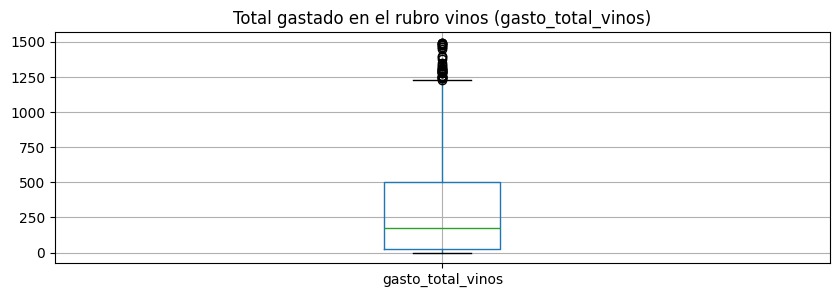

In [193]:
plt.figure(figsize=(10, 3))
df.boxplot(column='gasto_total_vinos')
plt.title('Total gastado en el rubro vinos (gasto_total_vinos)')
plt.xticks(rotation=0)
plt.show()

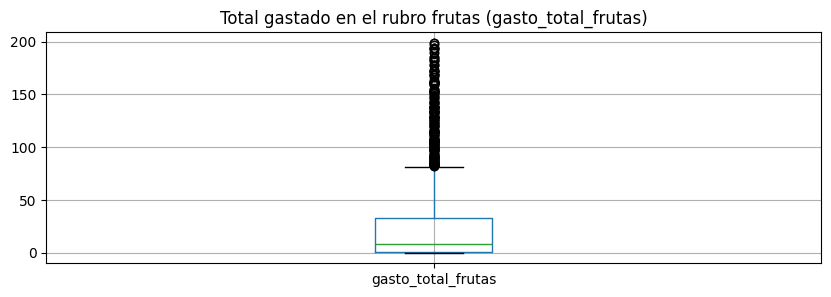

In [194]:
plt.figure(figsize=(10, 3))
df.boxplot(column='gasto_total_frutas')
plt.title('Total gastado en el rubro frutas (gasto_total_frutas)')
plt.xticks(rotation=0)
plt.show()

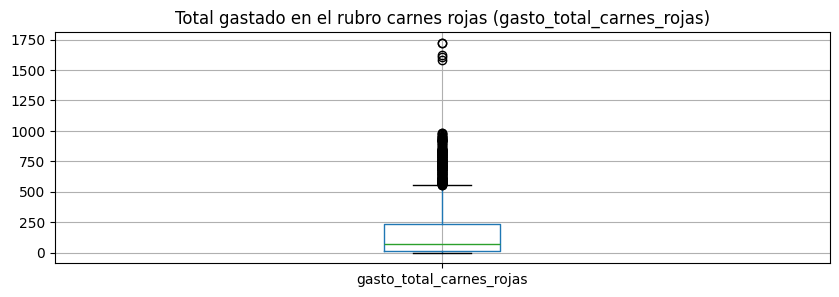

In [195]:
plt.figure(figsize=(10, 3))
df.boxplot(column='gasto_total_carnes_rojas')
plt.title('Total gastado en el rubro carnes rojas (gasto_total_carnes_rojas)')
plt.xticks(rotation=0)
plt.show()

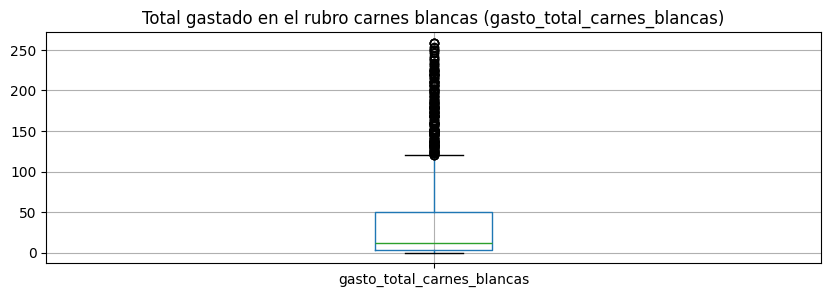

In [196]:
plt.figure(figsize=(10, 3))
df.boxplot(column='gasto_total_carnes_blancas')
plt.title('Total gastado en el rubro carnes blancas (gasto_total_carnes_blancas)')
plt.xticks(rotation=0)
plt.show()

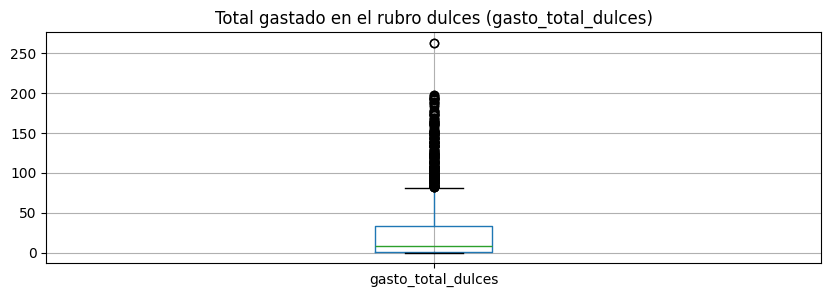

In [197]:
plt.figure(figsize=(10, 3))
df.boxplot(column='gasto_total_dulces')
plt.title('Total gastado en el rubro dulces (gasto_total_dulces)')
plt.xticks(rotation=0)
plt.show()

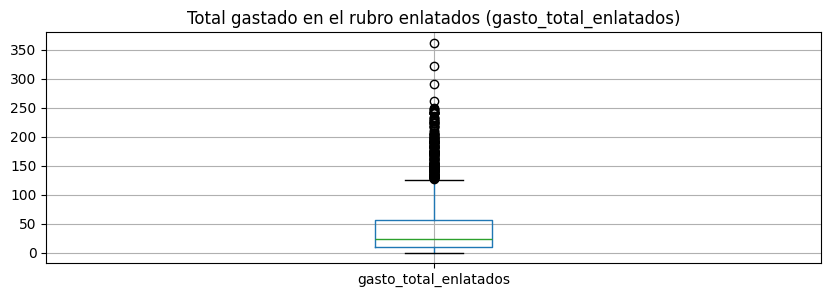

In [198]:
plt.figure(figsize=(10, 3))
df.boxplot(column='gasto_total_enlatados')
plt.title('Total gastado en el rubro enlatados (gasto_total_enlatados)')
plt.xticks(rotation=0)
plt.show()

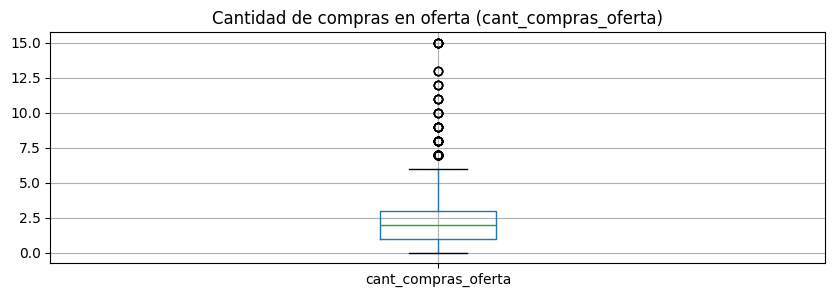

In [199]:
plt.figure(figsize=(10, 3))
df.boxplot(column='cant_compras_oferta')
plt.title('Cantidad de compras en oferta (cant_compras_oferta)')
plt.xticks(rotation=0)
plt.show()

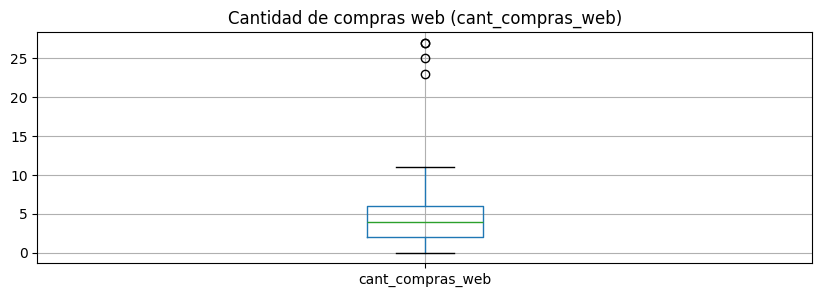

In [200]:
plt.figure(figsize=(10, 3))
df.boxplot(column='cant_compras_web')
plt.title('Cantidad de compras web (cant_compras_web)')
plt.xticks(rotation=0)
plt.show()

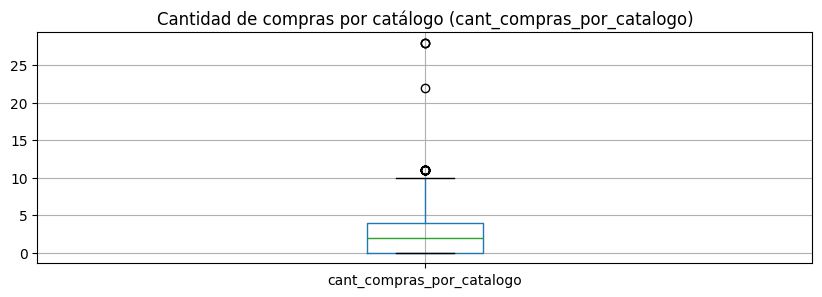

In [201]:
plt.figure(figsize=(10, 3))
df.boxplot(column='cant_compras_por_catalogo')
plt.title('Cantidad de compras por catálogo (cant_compras_por_catalogo)')
plt.xticks(rotation=0)
plt.show()

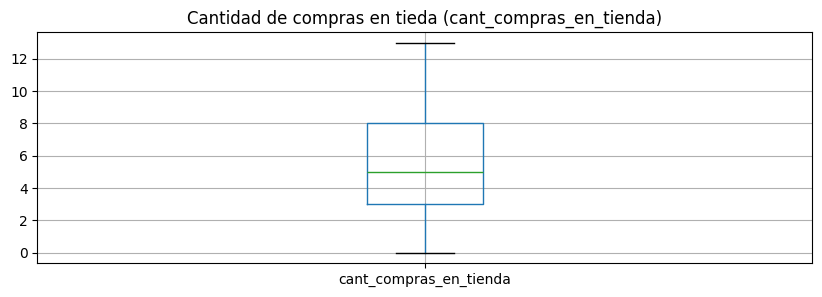

In [202]:
plt.figure(figsize=(10, 3))
df.boxplot(column='cant_compras_en_tienda')
plt.title('Cantidad de compras en tieda (cant_compras_en_tienda)')
plt.xticks(rotation=0)
plt.show()

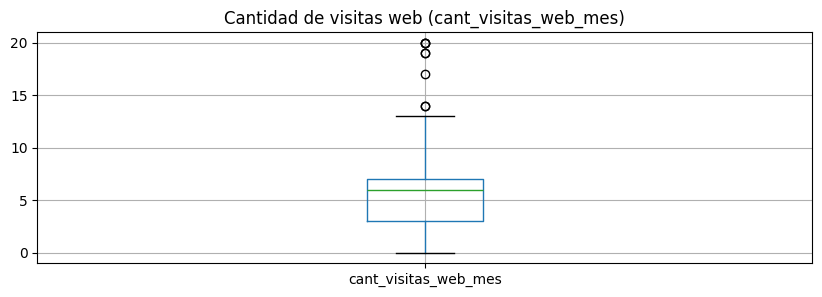

In [203]:
plt.figure(figsize=(10, 3))
df.boxplot(column='cant_visitas_web_mes')
plt.title('Cantidad de visitas web (cant_visitas_web_mes)')
plt.xticks(rotation=0)
plt.show()

### ![Data Wrangling](https://raw.githubusercontent.com/chetincho/proyecto_data_science_ii/main/img/data_wrangling.jpg)

💡 *Introducción:* Durante la etapa de Exploratory Data Analysis (EDA) además del descubrimiento inicial de la data provista por la empresa se detectó lo siguiente:

* 7 desvíos entre los tipos de datos esperados y los importados para los atributos: fch_alta_cliente, gasto_total_vinos, gasto_total_frutas, gasto_total_carnes_rojas, gasto_total_carnes_blancas, gasto_total_dulces, gasto_total_enlatados.
* 24 registros con valores nulos los cuales corresponden al 1.07% del total de registros para el atributo “ingresos_usd”.
* Se detectaron outliers sobre el atributo “ingresos_usd” para el valor “666666.0”
* Se detectaron valores duplicados.
* Se detectó la necesidad de contar con una columna la cual consolide el total gastado por cada cliente.

#### La conversión de tipos de datos
Procedemos a estandarizar el formato de los datos.

Corrección de la columna "fch_alta_cliente" de object -> datetime

In [166]:
df['fch_alta_cliente'] = pd.to_datetime(df['fch_alta_cliente'], format="%d/%m/%Y")

Verificamos si todos los registros pudieron convertirse correctamente sin generar valores NaT (Not a Time)

In [167]:
total_nat = df['fch_alta_cliente'].isna().sum()
print(f"El total de registros con fecha erronea es: {total_nat}")

El total de registros con fecha erronea es: 0


Corrección de la columna "gasto_total_vinos" de          int64 -> float64<br>
Corrección de la columna "gasto_total_frutas" de         int64 -> float64<br>
Corrección de la columna "gasto_total_carnes_rojas" de   int64 -> float64<br>
Corrección de la columna "gasto_total_carnes_blancas" de int64 -> float64<br>
Corrección de la columna "gasto_total_dulces" de         int64 -> float64<br>
Corrección de la columna "gasto_total_enlatados" de      int64 -> float64<br>

In [168]:
df['gasto_total_vinos'] = df['gasto_total_vinos'].astype(float)
df['gasto_total_frutas'] = df['gasto_total_frutas'].astype(float)
df['gasto_total_carnes_rojas'] = df['gasto_total_carnes_rojas'].astype(float)
df['gasto_total_carnes_blancas'] = df['gasto_total_carnes_blancas'].astype(float)
df['gasto_total_dulces'] = df['gasto_total_dulces'].astype(float)
df['gasto_total_enlatados'] = df['gasto_total_enlatados'].astype(float)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_cliente                  2241 non-null   int64         
 1   año_nac                     2241 non-null   int64         
 2   educacion                   2241 non-null   object        
 3   estado_civil                2241 non-null   object        
 4   ingresos_usd                2217 non-null   float64       
 5   cant_niños_casa             2241 non-null   int64         
 6   cant_adolecentes_casa       2241 non-null   int64         
 7   fch_alta_cliente            2241 non-null   datetime64[ns]
 8   dias_ult_compra             2241 non-null   int64         
 9   gasto_total_vinos           2241 non-null   float64       
 10  gasto_total_frutas          2241 non-null   float64       
 11  gasto_total_carnes_rojas    2241 non-null   float64     

💡 *Conclusión:* Se corrobora una conversión exitosa de los campos con errores de tipado.

#### Limpieza de valores nulos
Procedemos con la eliminacion de 24 registros con valores nulos para el atributo “ingresos_usd”.

In [170]:
df = df.dropna(subset=['ingresos_usd'])

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2217 entries, 0 to 2240
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_cliente                  2217 non-null   int64         
 1   año_nac                     2217 non-null   int64         
 2   educacion                   2217 non-null   object        
 3   estado_civil                2217 non-null   object        
 4   ingresos_usd                2217 non-null   float64       
 5   cant_niños_casa             2217 non-null   int64         
 6   cant_adolecentes_casa       2217 non-null   int64         
 7   fch_alta_cliente            2217 non-null   datetime64[ns]
 8   dias_ult_compra             2217 non-null   int64         
 9   gasto_total_vinos           2217 non-null   float64       
 10  gasto_total_frutas          2217 non-null   float64       
 11  gasto_total_carnes_rojas    2217 non-null   float64       
 1

#### Eliminación de valores atípicos (outliers)
Procedemos con la eliminacion de aquellos registros para el atributo “ingresos_usd” cuyo valor sea mayor a 600000.

In [172]:
df = df.drop(df[df['ingresos_usd'] > 600000].index)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2240
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_cliente                  2216 non-null   int64         
 1   año_nac                     2216 non-null   int64         
 2   educacion                   2216 non-null   object        
 3   estado_civil                2216 non-null   object        
 4   ingresos_usd                2216 non-null   float64       
 5   cant_niños_casa             2216 non-null   int64         
 6   cant_adolecentes_casa       2216 non-null   int64         
 7   fch_alta_cliente            2216 non-null   datetime64[ns]
 8   dias_ult_compra             2216 non-null   int64         
 9   gasto_total_vinos           2216 non-null   float64       
 10  gasto_total_frutas          2216 non-null   float64       
 11  gasto_total_carnes_rojas    2216 non-null   float64       
 1

#### Eliminación de valores duplicados
Procedemos con la eliminacion de registros duplicados.

In [174]:
df = df.drop_duplicates()

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2240
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_cliente                  2215 non-null   int64         
 1   año_nac                     2215 non-null   int64         
 2   educacion                   2215 non-null   object        
 3   estado_civil                2215 non-null   object        
 4   ingresos_usd                2215 non-null   float64       
 5   cant_niños_casa             2215 non-null   int64         
 6   cant_adolecentes_casa       2215 non-null   int64         
 7   fch_alta_cliente            2215 non-null   datetime64[ns]
 8   dias_ult_compra             2215 non-null   int64         
 9   gasto_total_vinos           2215 non-null   float64       
 10  gasto_total_frutas          2215 non-null   float64       
 11  gasto_total_carnes_rojas    2215 non-null   float64       
 1

#### Agregado de nuevos atributos
Durante la etapa de análisis se detectó la necesidad de contar con una columna la cual consolide el total gastado por cada cliente.

In [176]:
# Nuevo campo: "Total Gastado"
df['total_gral_gastado'] = df['gasto_total_vinos']+df['gasto_total_frutas']+df['gasto_total_carnes_rojas']+df['gasto_total_carnes_blancas']+df['gasto_total_dulces']+df['gasto_total_enlatados']

#### Publicación de los resultados
A continuación se publican los resultados del preprocesamiento del dataframe a un csv.

In [177]:
ruta_archivo = 'dataset\data_wrangling\datos_preprocesados.csv'
df.to_csv(ruta_archivo, index=False, sep=";")

In [178]:
url = 'https://raw.githubusercontent.com/chetincho/proyecto_data_science_ii/main/dataset/data_wrangling/datos_preprocesados.csv'
df = pd.read_csv(url, encoding='latin1', delimiter=',')

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_cliente                  2215 non-null   int64  
 1   aÃÂ±o_nac                  2215 non-null   int64  
 2   educacion                   2215 non-null   object 
 3   estado_civil                2215 non-null   object 
 4   ingresos_usd                2215 non-null   float64
 5   cant_niÃÂ±os_casa          2215 non-null   int64  
 6   cant_adolecentes_casa       2215 non-null   int64  
 7   fch_alta_cliente            2215 non-null   object 
 8   dias_ult_compra             2215 non-null   int64  
 9   gasto_total_vinos           2215 non-null   float64
 10  gasto_total_frutas          2215 non-null   float64
 11  gasto_total_carnes_rojas    2215 non-null   float64
 12  gasto_total_carnes_blancas  2215 non-null   float64
 13  gasto_total_dulces          2215 

In [180]:
df.head()

,id_cliente,aÃÂ±o_nac,educacion,estado_civil,ingresos_usd,cant_niÃÂ±os_casa,cant_adolecentes_casa,fch_alta_cliente,dias_ult_compra,gasto_total_vinos,...,campaÃÂ±a_mkt_1,campaÃÂ±a_mkt_2,campaÃÂ±a_mkt_3,campaÃÂ±a_mkt_4,campaÃÂ±a_mkt_5,quejas,id_base_contacto,cod_retorno_esperado,respuestas,total_gral_gastado
0,5524,1957,Universitario,Soltero,58138.0,0,0,2012-09-04,58,635.0,...,0,0,0,0,0,0,3,11,1,1617.0
1,2174,1954,Universitario,Soltero,46344.0,1,1,2014-03-08,38,11.0,...,0,0,0,0,0,0,3,11,0,27.0
2,4141,1965,Universitario,En pareja,71613.0,0,0,2013-08-21,26,426.0,...,0,0,0,0,0,0,3,11,0,776.0
3,6182,1984,Universitario,En pareja,26646.0,1,0,2014-02-10,26,11.0,...,0,0,0,0,0,0,3,11,0,53.0
4,5324,1981,Doctorado,Casado,58293.0,1,0,2014-01-19,94,173.0,...,0,0,0,0,0,0,3,11,0,422.0
